#### Import necessary Libraries

In [2]:
import requests
import pandas as pd
import json
from random import randint
import numpy as np
import pickle
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Load Data

In [3]:
phone_df = pd.read_csv('C:/Users/bb/Desktop/Phone-Price-Prediction/phone_df.csv')
phone_df.head()


,brand,screen_size,ram,rom,mp,battery,price
0,Nokia,6.52,4,64,13,5050,402800
1,Samsung,6.60,4,64,50,5000,738000
2,Infinix,6.60,2,32,8,5000,580000
3,Tecno,6.60,4,64,13,5000,493960
4,Infinix,6.60,2,32,8,5000,340500


In [4]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        379 non-null    object 
 1   screen_size  379 non-null    float64
 2   ram          379 non-null    int64  
 3   rom          379 non-null    int64  
 4   mp           379 non-null    int64  
 5   battery      379 non-null    int64  
 6   price        379 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 20.9+ KB


In [5]:
phone_df.describe()

,screen_size,ram,rom,mp,battery,price
count,379.000000,379.000000,379.000000,379.000000,379.000000,3.790000e+02
mean,6.525858,4.588391,39.546174,33.124011,4868.258575,9.568038e+05
std,0.335419,2.233576,16.635681,21.711990,627.499553,9.753494e+05
min,5.000000,1.000000,8.000000,5.000000,2000.000000,1.900000e+05
25%,6.500000,3.000000,28.000000,13.000000,5000.000000,4.790000e+05
50%,6.600000,4.000000,32.000000,48.000000,5000.000000,7.000000e+05
75%,6.600000,6.000000,56.000000,50.000000,5000.000000,9.750000e+05
max,7.600000,8.000000,64.000000,64.000000,6000.000000,6.290000e+06


#### Exploratory Data Analysis

visualization to assess the relationship of independent features with the target variable Price

In [6]:
# scatter plot of brand and price
fig = px.scatter(phone_df, x='brand', y='price', opacity = 0.25, template = 'plotly_dark', 
                color='brand', hover_data=['brand', 'price'],title = 'PHONE PRICE PREDICTION (BRAND - PRICE RELATIONSHIP)')
fig.update_layout(width=1000, height=600)
fig.show()


visualization to assess the relationship of screen size with the target variable Price

In [7]:
# scatter plot of screen_size and price
fig = px.scatter(phone_df, x='screen_size', y='price', opacity = 0.25, template = 'plotly_dark', 
                color='screen_size', hover_data=['screen_size', 'price'],title = 'PHONE PRICE PREDICTION (SCREEN SIZE - PRICE RELATIONSHIP)')
fig.update_layout(width=1000, height=600)
fig.show()

visualization to assess the relationship of ram with the target variable Price

In [8]:
# scatter plot of ram and price
fig = px.scatter(phone_df, x='ram', y='price', opacity = 0.25, template = 'plotly_dark', 
                color='ram', hover_data=['ram', 'price'],title = 'PHONE PRICE PREDICTION (RAM - PRICE RELATIONSHIP)')
fig.update_layout(width=1000, height=600)
fig.show()

visualization to assess the relationship of rom with the target variable Price

In [9]:
# scatter plot of rom and price
fig = px.scatter(phone_df, x='rom', y='price', opacity = 0.25, template = 'plotly_dark', 
                color='rom', hover_data=['rom', 'price'],title = 'PHONE PRICE PREDICTION (ROM - PRICE RELATIONSHIP)')
fig.update_layout(width=1000, height=600)
fig.show()

visualization to assess the relationship of mp with the target variable Price

In [10]:
# scatter plot of mp and price
fig = px.scatter(phone_df, x='mp', y='price', opacity = 0.25, template = 'plotly_dark', 
                color='mp', hover_data=['mp', 'price'],title = 'PHONE PRICE PREDICTION (MEGA PIXELS - PRICE RELATIONSHIP)')
fig.update_layout(width=1000, height=600)
fig.show()

visualization to assess the relationship of mp with the target variable Price

In [11]:
# scatter plot of battery and price
fig = px.scatter(phone_df, x='battery', y='price', opacity = 0.25, template = 'plotly_dark', 
                color='battery', hover_data=['battery', 'price'],title = 'PHONE PRICE PREDICTION (BATTERY - PRICE RELATIONSHIP)')
fig.update_layout(width=1000, height=600)
fig.show()

#### Data Preprocessing

Distribution of the Target Variable

In [12]:
fig = px.histogram(phone_df, x=["price"], template = 'plotly_dark', title = 'Histogram of Price')
fig.update_layout(width=1000, height=600)
fig.show()

Log Transform the Target (price)

In [13]:
# create a copy of data
data_copy = phone_df.copy()
# create a new feature Log_Price
data_copy['Log_Price'] = np.log(phone_df['price'])
# plot histogram
fig = px.histogram(data_copy, x=["Log_Price"], title = 'Histgram of Log Price', template = 'plotly_dark')
fig.update_layout(width=1000, height=600)
fig.show()

Remove Outliers from the Target Column

In [14]:
# Create a box plot of the 'Target' column to identify outliers
fig = px.box(data_copy, y='Log_Price')
fig.update_layout(width=800, height=600)
fig.show()

In [15]:
# Calculate the upper limit of outliers as the 97.5th percentile of the target column
upper_limit = data_copy['Log_Price'].quantile(0.931)

# Identify the upper outliers
upper_outliers = data_copy[data_copy['Log_Price'] > upper_limit]

# Remove the upper outliers from the dataset
no_outlier = data_copy[~data_copy.index.isin(upper_outliers.index)]

# Create a box plot of the 'Target' column to identify outliers
fig = px.box(no_outlier, y='Log_Price')
fig.update_layout(width=800, height=600)
fig.show()

In [16]:
# No Outliers
data = no_outlier
data = no_outlier.drop(['price'], axis=1)
data.head()

,brand,screen_size,ram,rom,mp,battery,Log_Price
0,Nokia,6.52,4,64,13,5050,12.906195
1,Samsung,6.60,4,64,50,5000,13.511699
2,Infinix,6.60,2,32,8,5000,13.270783
3,Tecno,6.60,4,64,13,5000,13.110210
4,Infinix,6.60,2,32,8,5000,12.738170


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 378
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        352 non-null    object 
 1   screen_size  352 non-null    float64
 2   ram          352 non-null    int64  
 3   rom          352 non-null    int64  
 4   mp           352 non-null    int64  
 5   battery      352 non-null    int64  
 6   Log_Price    352 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 22.0+ KB


visualization to assess outliers

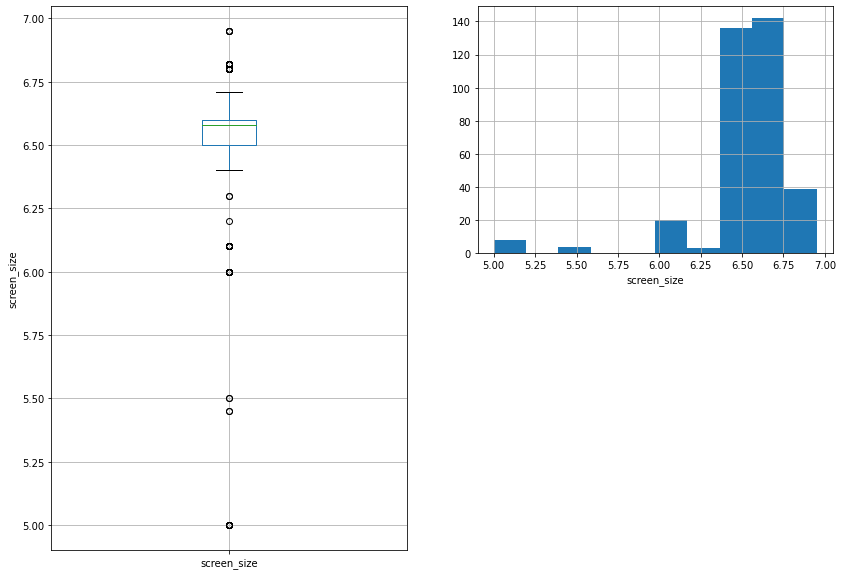

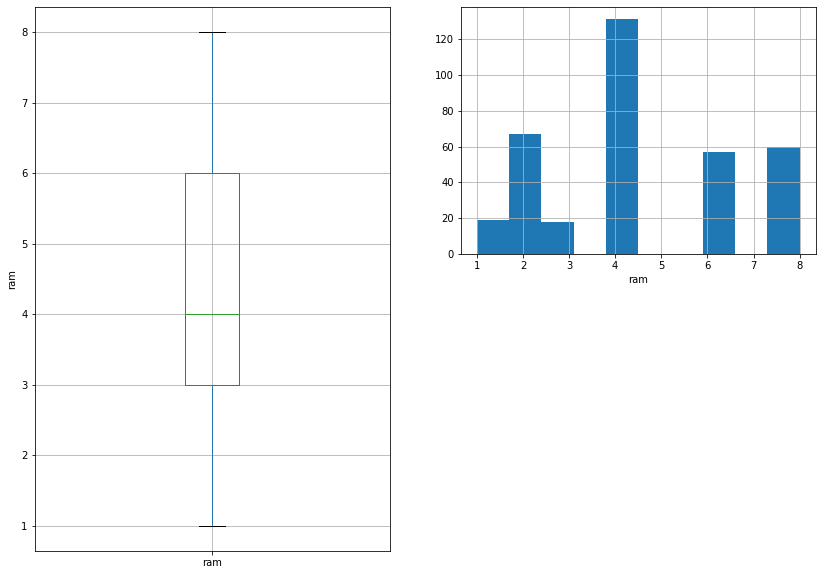

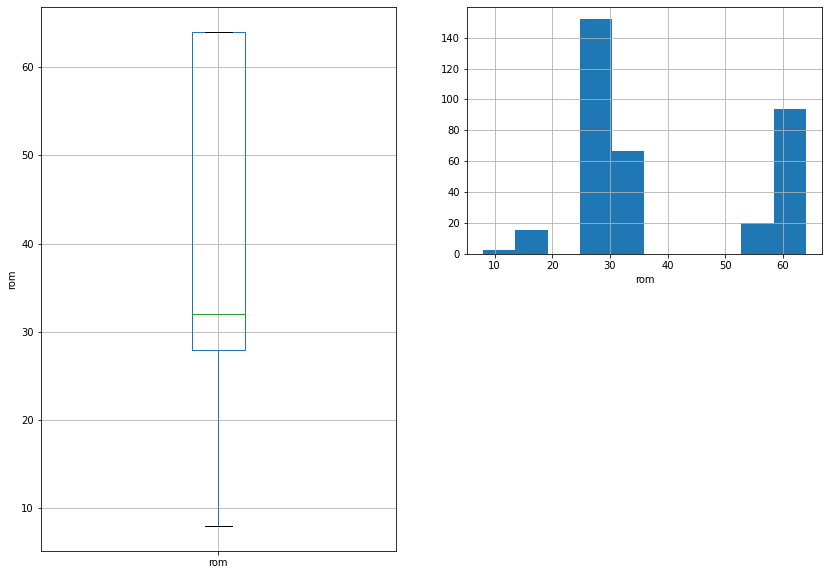

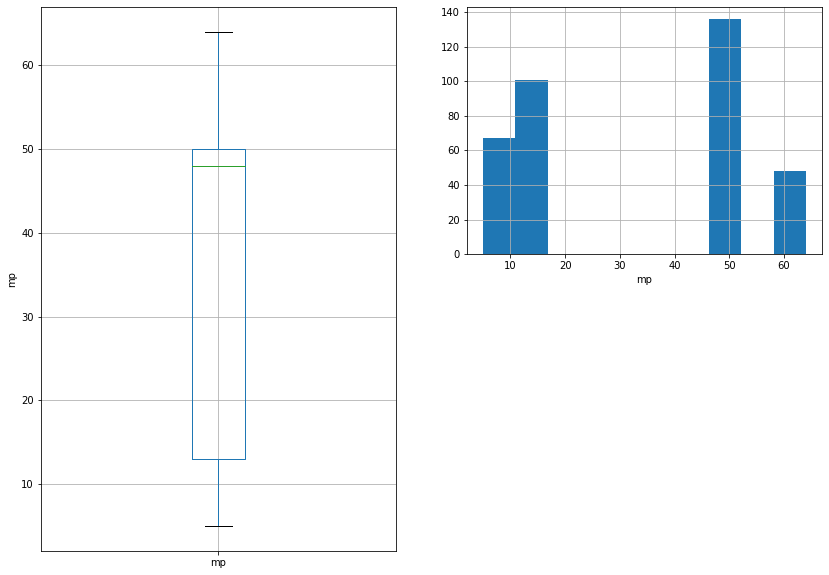

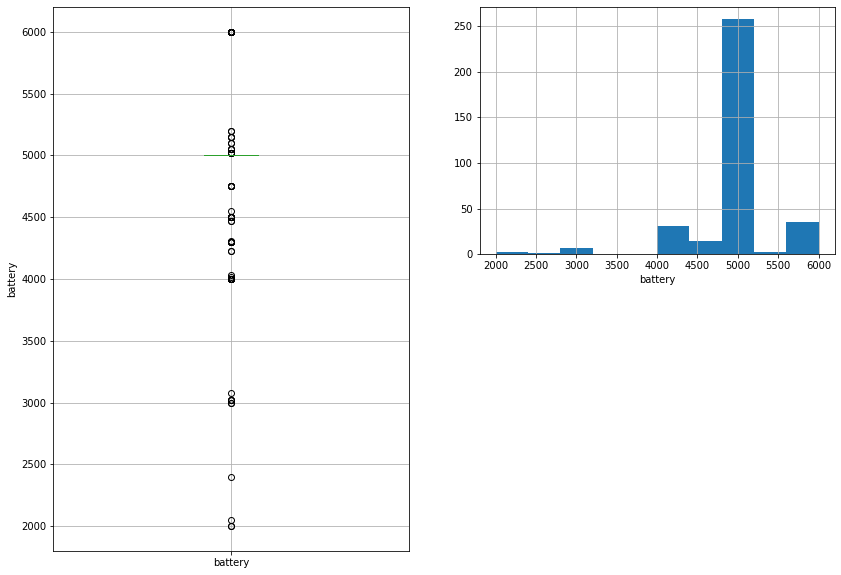

In [18]:
# box Plot to visualize Outliers in the Feature Variables
for var in ['screen_size', 'ram', 'rom', 'mp', 'battery']:
    plt.figure(figsize=(14, 10))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_ylabel(var)

    plt.subplot(2, 2, 2)
    fig = data[var].hist()
    fig.set_xlabel(var)

    plt.show()
    

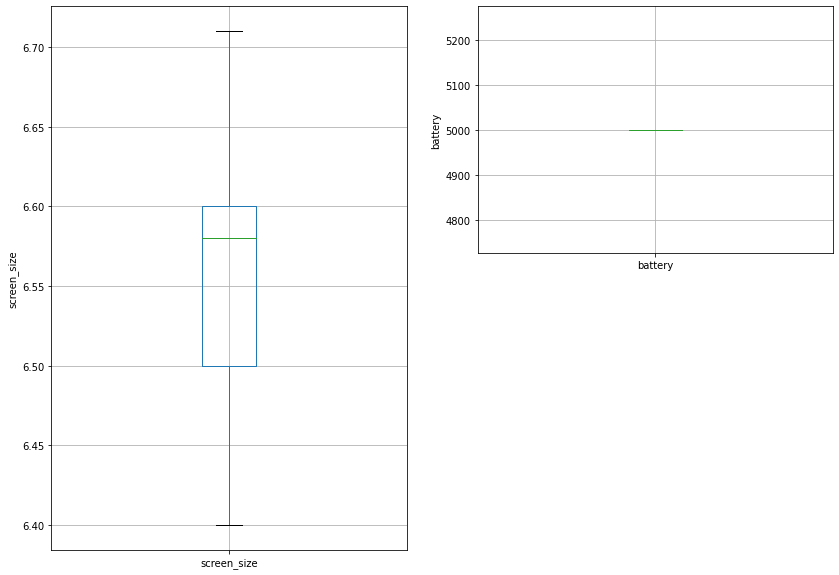

In [19]:
# Calculate the upper and lower limit of outliers of the screen_size column
upper_limit = data['screen_size'].quantile(0.89)
lower_limit = data['screen_size'].quantile(0.1)

# Identify the upper and lower outliers
upper_outliers = data[data['screen_size'] > upper_limit]
lower_outliers = data[data['screen_size'] < lower_limit]

# Remove the upper and lower outliers from the dataset
dataa = data[~data.index.isin(upper_outliers.index) & ~data.index.isin(lower_outliers.index) ]


# Calculate the upper and lower limit of outliers of the battery column
upper_limit = data['battery'].quantile(0.80)
lower_limit = data['battery'].quantile(0.2)

# Identify the upper and lower outliers
upper_outliers = data[data['battery'] > upper_limit]
lower_outliers = data[data['battery'] < lower_limit]

# Remove the upper and lower outliers from the dataset
dataaa = data[~data.index.isin(upper_outliers.index) & ~data.index.isin(lower_outliers.index) ]

# Create a box plot of the 'screen_size' column to identify outliers
for var in ['screen_size','battery']:
    if var == 'screen_size':
        plt.figure(figsize=(14, 10))
        plt.subplot(1, 2, 1)
        fig = dataa.boxplot(column=var)
        fig.set_ylabel(var)

    if var == 'battery':
        plt.subplot(2, 2, 2)
        fig = dataaa.boxplot(column=var)
        fig.set_ylabel(var)

        plt.show()

In [20]:
data['screen_size'] = dataa['screen_size']
data['battery'] = dataaa['battery']
data.rename(columns={'Log_Price': 'price'}, inplace=True)

data.head()

,brand,screen_size,ram,rom,mp,battery,price
0,Nokia,6.52,4,64,13,NaN,12.906195
1,Samsung,6.60,4,64,50,5000.0,13.511699
2,Infinix,6.60,2,32,8,5000.0,13.270783
3,Tecno,6.60,4,64,13,5000.0,13.110210
4,Infinix,6.60,2,32,8,5000.0,12.738170


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 378
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        352 non-null    object 
 1   screen_size  278 non-null    float64
 2   ram          352 non-null    int64  
 3   rom          352 non-null    int64  
 4   mp           352 non-null    int64  
 5   battery      245 non-null    float64
 6   price        352 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 22.0+ KB


In [22]:
data.fillna(data.mean(), inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 378
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        352 non-null    object 
 1   screen_size  352 non-null    float64
 2   ram          352 non-null    int64  
 3   rom          352 non-null    int64  
 4   mp           352 non-null    int64  
 5   battery      352 non-null    float64
 6   price        352 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 22.0+ KB


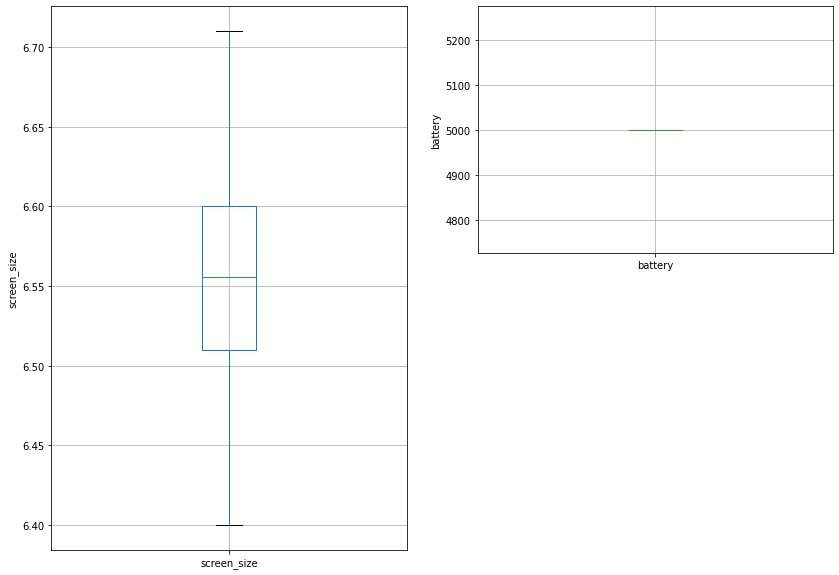

In [23]:
for var in ['screen_size','battery']:
    if var == 'screen_size':
        plt.figure(figsize=(14, 10))
        plt.subplot(1, 2, 1)
        fig = data.boxplot(column=var)
        fig.set_ylabel(var)

    if var == 'battery':
        plt.subplot(2, 2, 2)
        fig = data.boxplot(column=var)
        fig.set_ylabel(var)

        plt.show()

Visualize Correlation of the feature columns

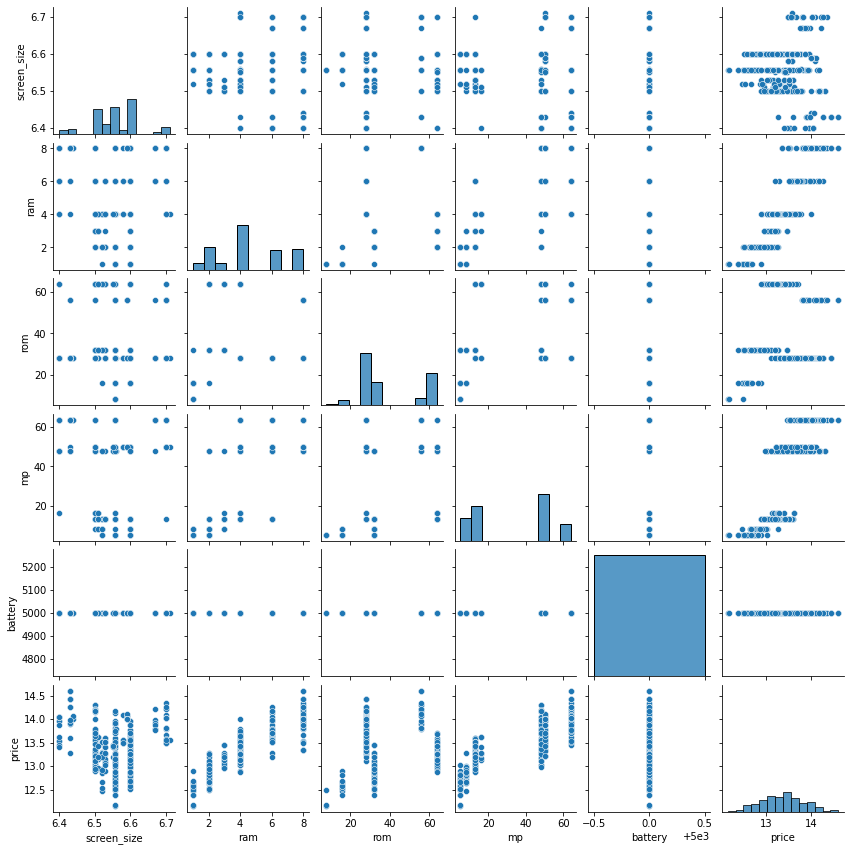

In [24]:
# plot the scatter matrix
sns.pairplot(data,  height=2, aspect=1)

# show the plot
plt.show()

<AxesSubplot:>

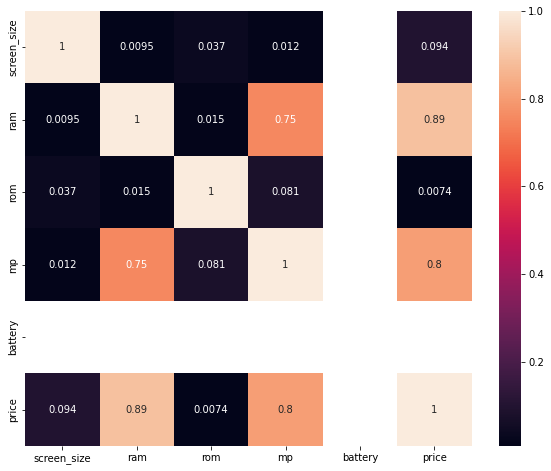

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().abs(),  annot=True)

#### Fiting models

In [26]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import os

X = data.drop(['price', 'battery'], axis=1)
y = data['price']

categorical_cols = [col_names for col_names in X.columns if X[col_names].nunique() < 10 and X[col_names].dtype == 'object']
numerical_cols = [col_names for col_names in X.columns if X[col_names].dtype in ['int64', 'float64']] 

# Processing of numerical data
numerical_transformer = StandardScaler()

# Processing of categorical data
categorical_transformer = OneHotEncoder(categories='auto')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

regular_reg = ElasticNetCV()
dt_reg = DecisionTreeRegressor(random_state=1)
bag_reg = BaggingRegressor(random_state=1)
ab_reg = AdaBoostRegressor(random_state=1)
kn_reg = KNeighborsRegressor()
ridge = Ridge(random_state=1)
l_reg = LinearRegression()
gb_reg = GradientBoostingRegressor(random_state=1)

models = {  'ElasticNetCV': regular_reg, 
            'DecisionTreeRegressor': dt_reg, 
            'BaggingRegressor': bag_reg, 
            'AdaBoostRegressor': ab_reg,
            'KNeighborsRegressor': kn_reg,
            'Ridge': ridge,
            'LinearRegression': l_reg,
            'GradientBoostingRegressor': gb_reg
        }

# Use the training and testing cross accuracy and divergence to identify the best model
def score_performance(models, X, y, process='Training'):
    print(f'Process; {process}')
    for model_name, model in models.items():
        # Using a pipline
        my_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        kf = KFold(n_splits=10)
        scores = cross_val_score(my_pipeline, X, y, cv=5)
        print(f'Model: {model_name}')
        print(f'Cross validation mean score: {round(np.mean(scores), 4)}')
        print(f'Cross validation std: {round(np.std(scores), 4)}')
        print('\n')

# train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
score_performance(models, X_train, y_train, process='Training')

Process; Training
Model: ElasticNetCV
Cross validation mean score: 0.8295
Cross validation std: 0.0275


Model: DecisionTreeRegressor
Cross validation mean score: 0.8736
Cross validation std: 0.0336


Model: BaggingRegressor
Cross validation mean score: 0.8886
Cross validation std: 0.0235


Model: AdaBoostRegressor
Cross validation mean score: 0.8599
Cross validation std: 0.0195


Model: KNeighborsRegressor
Cross validation mean score: 0.8518
Cross validation std: 0.0259


Model: Ridge
Cross validation mean score: 0.8293
Cross validation std: 0.0278


Model: LinearRegression
Cross validation mean score: 0.8293
Cross validation std: 0.0282


Model: GradientBoostingRegressor
Cross validation mean score: 0.8922
Cross validation std: 0.0296




In [27]:
np.random.seed(42)
gb_reg = GradientBoostingRegressor(random_state=1)

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

rscv = RandomizedSearchCV(estimator=gb_reg,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5) # print out results

my_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', rscv)
        ])

# Fit the RandomizedSearchCV version of gb_reg
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['screen_size', 'ram', 'rom',
                                                   'mp']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('model',
                 RandomizedSearchCV(cv=5,
                                    estimator=GradientBoostingRegressor(random_state=1),
                                    n_iter=20,
                                    param_distributions={'max_depth': [None, 5,
                                                                       10, 20,
                                                                       30],
                                                         'max_features': ['auto',
                                                                          'sqrt'],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                               4,
                                                                               6],
                                                         'n_estimators': [10,
                                                                          100,
                                                                          200,
                                                                          500,
                                                                          1000,
                                                                          1200]}))])

In [28]:
# Create evaluation function (the competition uses RMSLE)
def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))
    
# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_test, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_test, val_preds)}
    return scores

show_scores(my_pipeline)

{'Training MAE': 0.07070261475098884,
 'Valid MAE': 0.1166320169965098,
 'Training RMSLE': 0.0072618254354999846,
 'Valid RMSLE': 0.011246606147381492,
 'Training R^2': 0.9507363909255174,
 'Valid R^2': 0.868983126379058}

In [29]:
# Check the best hyperparameters found with GridSearchCV
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [30]:
ideal_model = GradientBoostingRegressor(n_estimators=100,
                            min_samples_split=2,
                            min_samples_leaf=2,
                            max_features='sqrt',
                            max_depth=None,
                            random_state=42)

# Using a pipline
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ideal_model)
])

# Fit the ideal model
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['screen_size', 'ram', 'rom',
                                                   'mp']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('model',
                 GradientBoostingRegressor(max_depth=None, max_features='sqrt',
                                           min_samples_leaf=2,
                                           random_state=42))])

In [31]:
show_scores(my_pipeline)

{'Training MAE': 0.07093357023603547,
 'Valid MAE': 0.11661837193035103,
 'Training RMSLE': 0.007267850458157943,
 'Valid RMSLE': 0.011255538470360645,
 'Training R^2': 0.9506522872819341,
 'Valid R^2': 0.8688404778467476}

In [32]:
my_pipeline.score(X_test, y_test)

0.8688404778467476

#### Save the model

In [33]:
# Saving and loading a model with pickle

# Save an existing model to file
pickle.dump(my_pipeline, open("phone_price_predictor.pkl", "wb"))